In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Load dataset
data = load_wine()

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

#Preprocess data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Create NN model
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=800)

#Train model
mlp.fit(X_train, y_train)

#Evaluate model
accuracy = mlp.score(X_test, y_test)
print('Accuracy:', accuracy)

#Make predictions
y_pred = mlp.predict(X_test)

#Classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



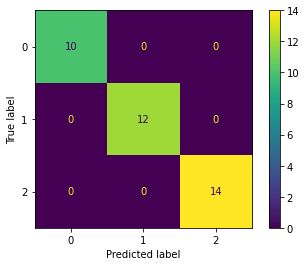

In [2]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp, X_test, y_test)

In [3]:
from sklearn.model_selection import cross_val_score
mlp_cross_validation = cross_val_score(mlp, X_train, y_train, cv=10)
print(mlp_cross_validation)
print('Mean Score =', mlp_cross_validation.mean().round(5)*100,'%')

[1.         0.93333333 1.         1.         1.         1.
 1.         0.85714286 1.         0.92857143]
Mean Score = 97.19 %
